The dataset for this project was derived from the 1990 U.S. census,
using one row per census block group. A block group is the smallest
geographical unit for which the U.S. Census Bureau publishes sample data
(a block group typically has a population of 600 to 3,000 people). The
data I investigate here consists of records about the houses in
california/

Main objective of the analysis is to focus on prediction. In this
project, I will be using different regression algorithms to find
relationship between the house price and its features . best candidate
algorithm with the best results will be chosen. The goal with this
implementation is to construct a model that accurately predicts the
price of each house given its features

In \[144\]:

    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt

In \[145\]:

    from sklearn.datasets import fetch_california_housing
    data1=fetch_california_housing(as_frame=True)

# Data exploration and preprocessing<a href="#Data-exploration-and-preprocessing" class="anchor-link">¶</a>

here we will be dividing the data into X and y (feautres and the target)

In \[146\]:

    df_X1=pd.DataFrame(data1.data,columns=data1.feature_names)
    df_y1=pd.DataFrame(data1.target)

In \[147\]:

    df_X1.info()

    <class 'pandas.core.frame.DataFrame'>
    RangeIndex: 20640 entries, 0 to 20639
    Data columns (total 8 columns):
     #   Column      Non-Null Count  Dtype  
    ---  ------      --------------  -----  
     0   MedInc      20640 non-null  float64
     1   HouseAge    20640 non-null  float64
     2   AveRooms    20640 non-null  float64
     3   AveBedrms   20640 non-null  float64
     4   Population  20640 non-null  float64
     5   AveOccup    20640 non-null  float64
     6   Latitude    20640 non-null  float64
     7   Longitude   20640 non-null  float64
    dtypes: float64(8)
    memory usage: 1.3 MB

as we can see we have 8 numerical features with 20640 records so there
is no encoding required

In \[148\]:

    df_y1.info()

    <class 'pandas.core.frame.DataFrame'>
    RangeIndex: 20640 entries, 0 to 20639
    Data columns (total 1 columns):
     #   Column       Non-Null Count  Dtype  
    ---  ------       --------------  -----  
     0   MedHouseVal  20640 non-null  float64
    dtypes: float64(1)
    memory usage: 161.4 KB

In \[149\]:

    data_california = pd.concat([df_X1, df_y1], axis=1)

In \[150\]:

    data_california

Out\[150\]:

|       | MedInc | HouseAge | AveRooms | AveBedrms | Population | AveOccup | Latitude | Longitude | MedHouseVal |
|-------|--------|----------|----------|-----------|------------|----------|----------|-----------|-------------|
| 0     | 8.3252 | 41.0     | 6.984127 | 1.023810  | 322.0      | 2.555556 | 37.88    | -122.23   | 4.526       |
| 1     | 8.3014 | 21.0     | 6.238137 | 0.971880  | 2401.0     | 2.109842 | 37.86    | -122.22   | 3.585       |
| 2     | 7.2574 | 52.0     | 8.288136 | 1.073446  | 496.0      | 2.802260 | 37.85    | -122.24   | 3.521       |
| 3     | 5.6431 | 52.0     | 5.817352 | 1.073059  | 558.0      | 2.547945 | 37.85    | -122.25   | 3.413       |
| 4     | 3.8462 | 52.0     | 6.281853 | 1.081081  | 565.0      | 2.181467 | 37.85    | -122.25   | 3.422       |
| ...   | ...    | ...      | ...      | ...       | ...        | ...      | ...      | ...       | ...         |
| 20635 | 1.5603 | 25.0     | 5.045455 | 1.133333  | 845.0      | 2.560606 | 39.48    | -121.09   | 0.781       |
| 20636 | 2.5568 | 18.0     | 6.114035 | 1.315789  | 356.0      | 3.122807 | 39.49    | -121.21   | 0.771       |
| 20637 | 1.7000 | 17.0     | 5.205543 | 1.120092  | 1007.0     | 2.325635 | 39.43    | -121.22   | 0.923       |
| 20638 | 1.8672 | 18.0     | 5.329513 | 1.171920  | 741.0      | 2.123209 | 39.43    | -121.32   | 0.847       |
| 20639 | 2.3886 | 16.0     | 5.254717 | 1.162264  | 1387.0     | 2.616981 | 39.37    | -121.24   | 0.894       |

20640 rows × 9 columns

Now lets check for outliers in our data

In \[151\]:

    fig, axes = plt.subplots(3,3,figsize= [10,20])
    # plt.figure(figsize = [10,30]);


    y=0
    x=0
    import seaborn as sns
    for column in data_california:
            sns.boxplot(data=data_california,y=column,ax=axes[x,y])
            y=y+1

            if y>2:
                x=x+1
                y=0
            if x>2:
                break

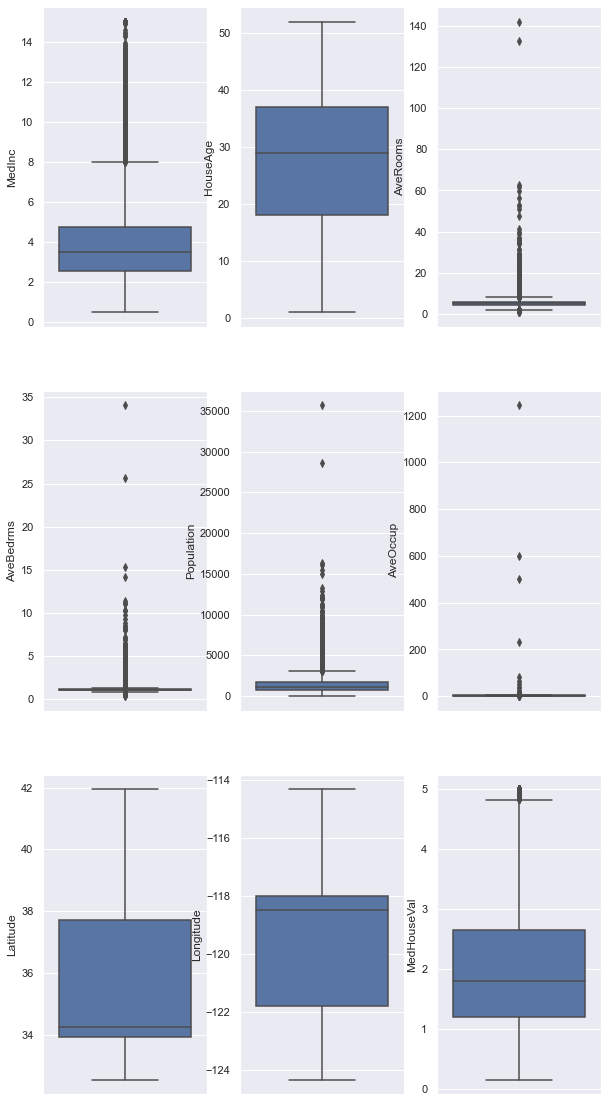

using the boxplot, we can see that we have outliers in the
MedInc,AveRooms,AveBerms,Population,AveOccup,MedhouseVal but we cant see
excatly where the ourliers begin to appear so we can remove them. So now
we will go in each of the previous columns in depth so we can deal with
their outliers

In \[152\]:

    for column in data_california[['MedInc', 'AveRooms','Population','AveOccup','MedHouseVal']]:
        print (column,data_california[column].describe(percentiles=[.99]))

    MedInc count    20640.000000
    mean         3.870671
    std          1.899822
    min          0.499900
    50%          3.534800
    99%         10.596540
    max         15.000100
    Name: MedInc, dtype: float64
    AveRooms count    20640.000000
    mean         5.429000
    std          2.474173
    min          0.846154
    50%          5.229129
    99%         10.357033
    max        141.909091
    Name: AveRooms, dtype: float64
    Population count    20640.000000
    mean      1425.476744
    std       1132.462122
    min          3.000000
    50%       1166.000000
    99%       5805.830000
    max      35682.000000
    Name: Population, dtype: float64
    AveOccup count    20640.000000
    mean         3.070655
    std         10.386050
    min          0.692308
    50%          2.818116
    99%          5.394812
    max       1243.333333
    Name: AveOccup, dtype: float64
    MedHouseVal count    20640.000000
    mean         2.068558
    std          1.153956
    min          0.149990
    50%          1.797000
    99%          5.000010
    max          5.000010
    Name: MedHouseVal, dtype: float64

Using the .99percentile we can see where exacly does lie 99 percent of
our data in each of the previous columns we can use these values to
remove the outliers

In \[153\]:

    #removing the outliers 
    data_california = data_california[data_california['MedInc'] <= 10.6]
    data_california = data_california[data_california['AveRooms'] <= 10.4]
    data_california = data_california[data_california['Population'] <=5806]
    data_california = data_california[data_california['AveOccup'] <= 1243.3]

In \[154\]:

    data_california.info()

    <class 'pandas.core.frame.DataFrame'>
    Int64Index: 20033 entries, 0 to 20639
    Data columns (total 9 columns):
     #   Column       Non-Null Count  Dtype  
    ---  ------       --------------  -----  
     0   MedInc       20033 non-null  float64
     1   HouseAge     20033 non-null  float64
     2   AveRooms     20033 non-null  float64
     3   AveBedrms    20033 non-null  float64
     4   Population   20033 non-null  float64
     5   AveOccup     20033 non-null  float64
     6   Latitude     20033 non-null  float64
     7   Longitude    20033 non-null  float64
     8   MedHouseVal  20033 non-null  float64
    dtypes: float64(9)
    memory usage: 1.5 MB

our records are now 20033 instead of 20640

Lets check for the correlation in out data and see if there will be any
multicollinearity since we are going to be Trying Linear regression
first

In \[155\]:

    import seaborn as sns
    import matplotlib.pyplot as plt

    correlations=data_california.corr()
    sns.heatmap(data=correlations ,square=True,cmap='bwr')
    sns.set(rc = {'figure.figsize':(15,15)})
    plt.xticks(rotation=0);
    plt.yticks(rotation=0);

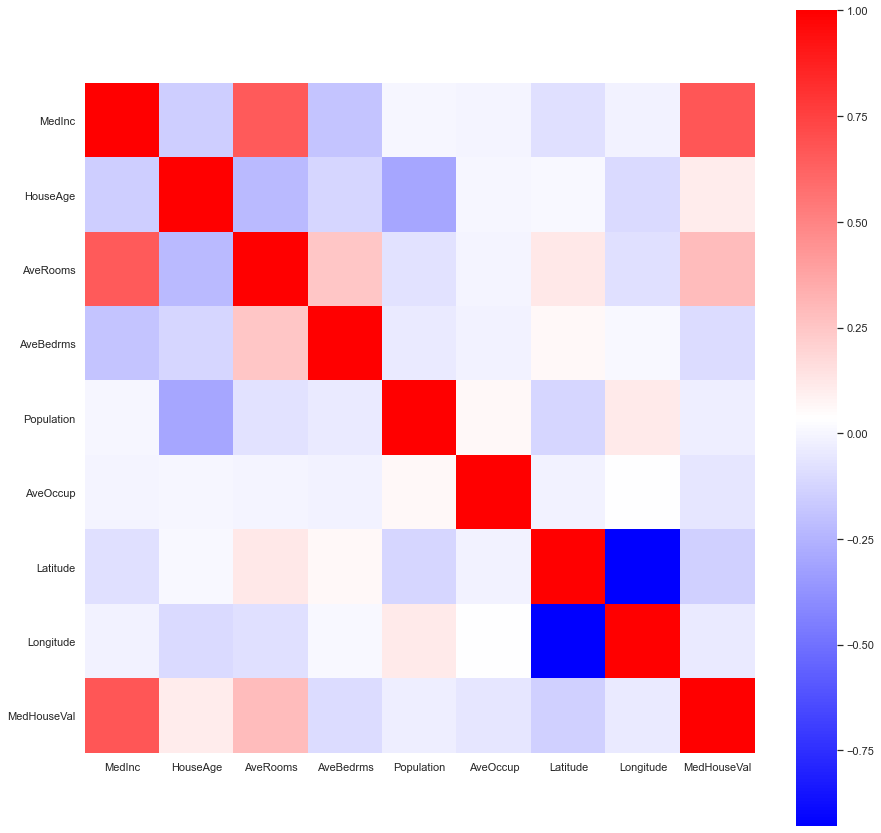

as seen in the graph above we can notice a strong positive correlation
between the MedInc and the MedHouse Val and the AveRooms

we can also notice a strong negative correlation between the Latitude
and the Longtitude.

so if we are going to try here multiple vanilla linear regression then
we have to remove either the MedInc or the AveRooms and either the
Latitude or the Longtitude to avoid the multicollinearity.

Now lets divide our data to features and target data frames

In \[156\]:

    print(data_california.columns)

    Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
           'Latitude', 'Longitude', 'MedHouseVal'],
          dtype='object')

In \[157\]:

    features = data_california[['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
           'Latitude', 'Longitude']]
    df_X = features.copy()
    target=data_california[['MedHouseVal']]
    df_y=target.copy()

In \[158\]:

    df_X.head()

Out\[158\]:

|     | MedInc | HouseAge | AveRooms | AveBedrms | Population | AveOccup | Latitude | Longitude |
|-----|--------|----------|----------|-----------|------------|----------|----------|-----------|
| 0   | 8.3252 | 41.0     | 6.984127 | 1.023810  | 322.0      | 2.555556 | 37.88    | -122.23   |
| 1   | 8.3014 | 21.0     | 6.238137 | 0.971880  | 2401.0     | 2.109842 | 37.86    | -122.22   |
| 2   | 7.2574 | 52.0     | 8.288136 | 1.073446  | 496.0      | 2.802260 | 37.85    | -122.24   |
| 3   | 5.6431 | 52.0     | 5.817352 | 1.073059  | 558.0      | 2.547945 | 37.85    | -122.25   |
| 4   | 3.8462 | 52.0     | 6.281853 | 1.081081  | 565.0      | 2.181467 | 37.85    | -122.25   |

In \[159\]:

    df_y.head()

Out\[159\]:

|     | MedHouseVal |
|-----|-------------|
| 0   | 4.526       |
| 1   | 3.585       |
| 2   | 3.521       |
| 3   | 3.413       |
| 4   | 3.422       |

# Linear Regression<a href="#Linear-Regression" class="anchor-link">¶</a>

Now lets drop the AveRooms and the Longtiude since we are going to be
using Linear Regression and we want to avoid the multicollinearity issue

In \[160\]:

    dfXLinear=df_X.copy(deep=True)
    dfXLinear.drop(['AveRooms', 'Longitude'], axis=1,inplace=True)
    dfyLinear=df_y.copy(deep=True)

In \[161\]:

    from sklearn.model_selection import train_test_split
    X_train,X_test,y_train,y_test=train_test_split(dfXLinear,dfyLinear,test_size=0.30,random_state=500,shuffle=True)

Now lets intialize our Linear Regression model and see our r2 score and
our root mean squared error

In \[162\]:

    from sklearn.linear_model import LinearRegression
    LR=LinearRegression()
    LR.fit(X_train, y_train)
    predict = LR.predict(X_test)

In \[163\]:

    from sklearn.metrics import r2_score
    scoreLR = r2_score(y_test.values, predict)
    scoreLR

Out\[163\]:

    0.5233025343105255

In \[164\]:

    from sklearn.metrics import mean_squared_error

    rmseLinear=np.sqrt(mean_squared_error(y_test, predict))
    print(rmseLinear)

    0.7814537663736364

Looking at our R2 score and our rmse it seems that Linear Regression
model didn't do that well when it came to prediciton

In \[165\]:

    f = plt.figure(figsize=(6,6))
    ax = plt.axes()

    ax.plot(y_test,predict, 
             marker='o', ls='', ms=3.0)

    lim = (0,6)

    ax.set_xlabel('Actual Price', 
                   fontweight ='bold');
    ax.set_ylabel('Predicted Price', 
                   fontweight ='bold');

    ax.set_xlim(lim)
    ax.set_ylim(lim)
    ax.set_title("Linear Regression Results")

Out\[165\]:

    Text(0.5, 1.0, 'Linear Regression Results')

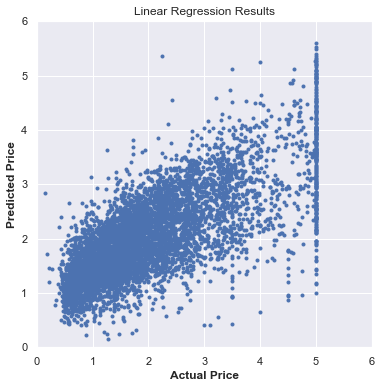

As seen above the results from linear regression isnt thatwhen we
compare the actual vs predicted prices but we can't deduce that much
from the graph so we will stick to the r2 and rmse scores

# Now lets try Ridge Regression<a href="#Now-lets-try-Ridge-Regression" class="anchor-link">¶</a>

we will try the ridge regression with built in Cross validation so we
can test different alphas and see which one will get us to the best
results

In \[177\]:

    from sklearn.linear_model import RidgeCV

    alphas = [0.005, 0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30,80]

now since we are using ridge regression, scaling our data here will be
beneficial. so lets scale our data

we dont need to check for multicollinearity though as ridge,lasso and
elastic net models handle this issue very well

In \[178\]:

    from sklearn.preprocessing import scale

    Xtrain,Xtest,ytrain,ytest=train_test_split(df_X,df_y,test_size=0.30,random_state=50)
    X_trainScaled = scale(Xtrain)
    X_testScaled = scale(Xtest)

In \[179\]:

    ridgeCV = RidgeCV(alphas=alphas, 
                      cv=4).fit(X_trainScaled, ytrain)

    ridgeCV_rmse =np.sqrt(mean_squared_error(ytest,ridgeCV.predict(X_testScaled)))

    print(ridgeCV.alpha_, ridgeCV_rmse)

    80.0 0.6974639729241483

In \[180\]:

    predict = ridgeCV.predict(X_testScaled)
    scoreR = r2_score(ytest.values, predict)
    scoreR

Out\[180\]:

    0.6071163702365694

Ridge regression did a better job than the Linear regression in terms of
accuracy

# Trying lasso regression<a href="#Trying-lasso-regression" class="anchor-link">¶</a>

In \[171\]:

    from sklearn.linear_model import LassoCV

    alphas2 = np.array([1e-5, 5e-5, 0.0001, 0.0005])

    lassoCV = LassoCV(alphas=alphas2,
                      max_iter=10000000,
                      cv=3).fit(X_trainScaled, ytrain)

    lassoCV_rmse = np.sqrt(mean_squared_error(ytest,lassoCV.predict(X_testScaled)))

    print(lassoCV.alpha_, lassoCV_rmse)  

    0.0005 0.6972295336433021

    C:\Users\PC\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
      return f(*args, **kwargs)

checking the r2 score

In \[172\]:

    predict = lassoCV.predict(X_testScaled)
    scoreL = r2_score(ytest.values, predict)
    score

Out\[172\]:

    0.6071163702365694

# Trying Elastic net reggression<a href="#Trying-Elastic-net-reggression" class="anchor-link">¶</a>

In \[173\]:

    from sklearn.linear_model import ElasticNetCV

    l1_ratios = np.linspace(0.1, 0.9, 9)

    elasticNetCV = ElasticNetCV(alphas=alphas2, 
                                l1_ratio=l1_ratios,
                                max_iter=1e4).fit(X_trainScaled, ytrain)
    elasticNetCV_rmse = np.sqrt(mean_squared_error(ytest,elasticNetCV.predict(X_testScaled)))

    print(elasticNetCV.alpha_, elasticNetCV.l1_ratio_, elasticNetCV_rmse)

    0.0005 0.9 0.6972218696344515

    C:\Users\PC\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
      return f(*args, **kwargs)

In \[174\]:

    predict = elasticNetCV.predict(X_testScaled)
    scoreE = r2_score(ytest.values, predict)
    scoreE

Out\[174\]:

    0.607389077972597

now since we have finished trying the 4 models we will check which one
is better comparing their r2 scores

In \[175\]:

    rmse_vals = [scoreLR, scoreR, scoreL, scoreE]

    labels = ['Linear', 'Ridge', 'Lasso', 'ElasticNet']

    r2_df = pd.Series(rmse_vals, index=labels).to_frame()
    r2_df.rename(columns={0: 'R2 score'}, inplace=1)
    r2_df

Out\[175\]:

|            | R2 score |
|------------|----------|
| Linear     | 0.523303 |
| Ridge      | 0.607116 |
| Lasso      | 0.607380 |
| ElasticNet | 0.607389 |

as we can see here elasticNet did slightly better job than Lasso and
Ridge regression with Linear being the worst of all of them so
elasticNet regression is recommended to be used at predicting the price
of the houses

# Next steps<a href="#Next-steps" class="anchor-link">¶</a>

Maybe having more features can help us acheive better results as the 4
models still didnt have that good results at predicting the price of our
houses.

We can try to gather more data and features and retrain our models to
see if we can acheive better results